# Esperanza y varianza de VARIABLES ALEATORIAS
 

### Ejemplo de obtención de media y varianza a partir de una Funcion de distribución que primero se debe derivar para obtener la fucnión de probabilidad y con ella la esperanza y varianza 

Considere la variable aleatoria 𝑌 cuya función de distribución (acumulativa) es la que se indica a  continuación. <br>
a) Decida si la variable aleatoria 𝑌 es discreta o continua. Justifique su respuesta.<br>
b) Construya la función 𝑓𝑌(𝑦).<br>
c) Calcule la media y la varianza de Y<br>

$$F_{Y}(y) = \left\{\begin{matrix}
0, & y<=0\\ 
y/8 ,& 0<y<2\\ 
y^{2}/16 ,& 2<=y<4\\ 
1 ,& y>4\\  
\end{matrix}\right.$$

##### Construya la función 𝑓𝑌(𝑦).<br>

Sabemos que la relación entre la función de distribución acumulada F(Y) y la función de distribcuión de densidad de probabilidad f(y) es:

$$F_{y}(Y) = \int_{-\infty }^{y} f_{y}(t) dt$$

Y por lo tanto se podría decir que es posible calcular la función de densidad de probabilidad f(y) a partir de su función de densidad acumuladad de probabilidad Fy(Y) de la siguiente manera:

$$f_{y}(y) = F'_{y}(t) =\frac{dFy}{dy}$$

Por lo tanto en nuestro caso habría que deribar cada una de las secciones de la función acumulativa F(y) con respecto a y para obtener f(y)

In [1]:
import sympy as sp

# define the symbol
y = sp.Symbol('y')

# define the piecewise function
F_y = sp.Piecewise(
    (0, y <= 0),
    (y/8, (y > 0) & (y < 2)),
    (y**2/16, (y >= 2) & (y < 4)),
    (1, y >= 4)
)

# differentiate F_y to obtain f_y
f_y = sp.diff(F_y, y)

# print f_y
print("The probability density function is:")
sp.pprint(f_y)


The probability density function is:
⎧ 0   for y ≤ 0
⎪              
⎪1/8  for y < 2
⎪              
⎨ y            
⎪ ─   for y < 4
⎪ 8            
⎪              
⎩ 0   otherwise


The PDF function calculated derivating the distribution function is: 

In [2]:
f_y

Piecewise((0, y <= 0), (1/8, y < 2), (y/8, y < 4), (0, True))

Graficando la FDP

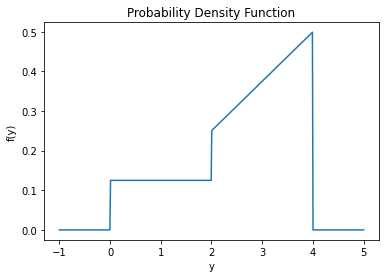

In [5]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np


# Define the y values to plot
y_values = np.linspace(-1, 5, 500)

# Evaluate the PDF at the y values
pdf_values = [f_y.subs(y, y_val) for y_val in y_values]

# Plot the PDF
plt.plot(y_values, pdf_values)
plt.xlabel('y')
plt.ylabel('f(y)')
plt.title('Probability Density Function')
plt.show()



#### Calcule la media y la varianza de Y<br>

Recordando que la esperanza de una variable aleatoria Y, dada su función de distribución f(y) se definia para el caso de las variables CONTINUAS como:

$$E(Y) = \int_{-\infty }^{\infty } y*p(y)$$

Entonces resolviendo la integral para obtener la media se tiene (solución analitica):

In [3]:
import sympy

# Define the symbol 'y' and the function 'f'
y = sympy.Symbol('y')
f = sympy.Piecewise((0, y<=0), (1/8, y<2), (y/8, y<4), (0, True))

# Integrate the function 'f'* y with respect to 'y'
F = sympy.integrate(f*y, y)

# Simplify the result
F = F.simplify()

# Show the result
print(f"The analytical solution is: {F}")


The analytical solution is: Piecewise((0, y <= 0), (0.0625*y**2, y < 2), (y**3/24 - 0.0833333333333333, y < 4), (2.58333333333333, True))


Evaluando la integral de la media para obtener la (solución numerica)

In [4]:
# Evaluate the integral at x=2
mean_1 = F.subs(y, 4) - F.subs(y, 0)

# Show the result
print(f"The mean is: {mean_1}")

The mean is: 2.58333333333333


Para el caso de la varianza de la variable aleatoria Y, se define como, la esperanza del cuadrado de la desviación con respecto a la media, es decir:

$$Var(Y) =E[(Y-\mu )^2]$$

Y para continuas:

$$Var(Y) = \sigma ^2 (y) = \int_{-\infty }^{\infty }(Y-\mu )^2 *f(y)$$

Entonces resolviendo la integral para obtener la varianza se tiene (solución analitica):

In [5]:
import sympy

# Define the symbol 'y' and the function 'f'
y = sympy.Symbol('y')
f = sympy.Piecewise((0, y<=0), (1/8, y<2), (y/8, y<4), (0, True))

# Integrate the function 'f'* y with respect to 'y'
f_var_1 = sympy.integrate(f*(y-mean_1)**2, y)

# Simplify the result
f_var_1 = f_var_1.simplify()

# Show the result
print(f"The variance solution is: {f_var_1}")

The variance solution is: Piecewise((0, y <= 0), (y*(0.0416666666666667*y**2 - 0.322916666666667*y + 0.834201388888889), y < 2), (0.03125*y**4 - 0.215277777777778*y**3 + 0.417100694444444*y**2 + 0.263888888888889, y < 4), (1.15972222222222, True))


Evaluando la integral de la varianza para obtener la (solución numerica)

In [6]:
# Evaluate the integral at x=2
var_1 = f_var_1.subs(y, 4) - f_var_1.subs(y, 0)

# Show the result
print(f"The variance is: {var_1}")

The variance is: 1.15972222222222


#### RESUMEN DE CALCULO DE MEAN Y VARIANZA DADA UNA PDF

In [21]:
import sympy

# Define the symbol 'y' and the function 'f'
y = sympy.Symbol('y')
f = sympy.Piecewise((0, y <= 0), (1/8, y < 2), (y/8, y < 4), (0, True))

# Calculate the expected value E(Y)
EY = sympy.integrate(y*f, (y, -sympy.oo, sympy.oo))
print(f"The expected value E(Y) is: {EY}")

# Calculate the variance Var(Y)
VY = sympy.integrate((y-EY)**2*f, (y, -sympy.oo, sympy.oo))
VY = VY.simplify()
print(f"The variance Var(Y) is: {VY}")



The expected value E(Y) is: 2.58333333333333
The variance Var(Y) is: 1.15972222222222


#### Esperanza y varianza dada una PDF (de la que primero se debe encontrar el valor de una constante que lo haga pdf y despues obtener la media y varianza como las integrales respectivas)

$$f_{Y}(y) = \left\{\begin{matrix}
c*y^2(1-y)^4, & 0<=y<=1\\ 
 0, & en otro caso
\end{matrix}\right.$$

En donde 𝑐 es una constante.


a) Encuentre el valor de c que hace de 𝑓𝑌 (𝑦) una función de densidad <br>
b) Obtenga la media y la varianza de 𝑌.<br>
c) Genere 30 valores aleatorios de 𝑌 y calcule el promedio de dichos valores. Muestre paso a  paso su procedimiento realizado ya sea manualmente o con algún software, en cuyo caso es necesario mostrar la codificación

##### a) Encuentre el valor de c ó k que hace de 𝑓𝑌 (𝑦) una función de densidad <br>

In [34]:
import sympy

# Define the symbol 'y' and the function 'f'
x = sympy.Symbol('y')
c = sympy.Symbol('c')
f = sympy.Piecewise((c*y**2* (y-1)**4, (y>=0)&(y<=1)), (0, True))

# Integrate the function 'f' with respect to 'y'
F_4 = sympy.integrate(f, y)

# Simplify the result
F_4 = F_4.simplify()

# Show the result
print(f"The analytical solution is: {F}")

The analytical solution is: Piecewise((0, y <= 0), (0.0625*y**2, y < 2), (y**3/24 - 0.0833333333333333, y < 4), (2.58333333333333, True))


In [35]:
# Evaluate the integral at x=2
result_4 = F_4.subs(y, 1) - F_4.subs(y, 0)

# Show the result
print(f"The result is: {result_4}")

The result is: c/105


c) To calculate the value of k or c that makes the integral equal to 1, you can solve the following equation for c:

In [36]:
# Set the integral equal to 1
eq_4 = sympy.Eq(F_4.subs(y, 1) - F_4.subs(x, 0), 1)

# Solve for 'c'
c_value_4 = sympy.solve(eq_4, c)

# Show the result
print(f"The value of c that makes fy(y) a probability function is: {c_value_4}")

The value of c that makes fy(y) a probability function is: [105]


##### Otro ejemplo de cálculo de media y varianza en UN 'SOLO PASO' (en este caso primero se calculo / determino el valor de c para hacer de f(y) una PDF)

In [33]:

import sympy

# Define the symbol 'y' and the function 'f'
y = sympy.Symbol('y')
f = sympy.Piecewise((105*y**2*(1-y)**4, (y>=0)&(y<=1)), (0, True))

# Calculate the expected value E(Y)
EY_4 = sympy.integrate(y*f, (y, -sympy.oo, sympy.oo))
print(f"The expected value E(Y) is: {EY}")

# Calculate the variance Var(Y)
VY_4 = sympy.integrate((y-EY_4)**2*f, (y, -sympy.oo, sympy.oo))
VY_4 = VY_4.simplify()
print(f"The variance Var(Y) is: {VY_4}")



The expected value E(Y) is: 3/8
The variance Var(Y) is: 5/192


#### c) Genere 30 valores aleatorios de 𝑌 y calcule el promedio de dichos valores. Muestre paso a  paso su procedimiento realizado ya sea manualmente o con algún software, en cuyo caso es necesario mostrar la codificación

#### DEBEMOS OBVIAMENTE CALCULAR LA funcion de distribución ACUMULADA como la integral de la PDF 

In [37]:
import sympy

# Define the symbol 'y' and the function 'f'
x = sympy.Symbol('y')
f = sympy.Piecewise((105*y**2* (y-1)**4, (y>=0)&(y<=1)), (0, True))

# Integrate the function 'f' with respect to 'y'
f_distribucion_4 = sympy.integrate(f, x)

# Simplify the result
f_distribucion_4 = f_distribucion_4.simplify()

# Show the result
print(f"The analytical solution is: {f_distribucion_4}")

The analytical solution is: Piecewise((0, y <= 0), (y**3*(15*y**4 - 70*y**3 + 126*y**2 - 105*y + 35), y <= 1), (1, True))


__Paso 3. Calcular el valor de la variable x para cada elemento previamente simulado__

In [38]:
import random

# Set the seed to 42
random.seed(42)
# generate 30 random numbers between 0 and 1
random_numbers_30 = [random.random() for _ in range(30)]

print(random_numbers_30)



[0.6394267984578837, 0.025010755222666936, 0.27502931836911926, 0.22321073814882275, 0.7364712141640124, 0.6766994874229113, 0.8921795677048454, 0.08693883262941615, 0.4219218196852704, 0.029797219438070344, 0.21863797480360336, 0.5053552881033624, 0.026535969683863625, 0.1988376506866485, 0.6498844377795232, 0.5449414806032167, 0.2204406220406967, 0.5892656838759087, 0.8094304566778266, 0.006498759678061017, 0.8058192518328079, 0.6981393949882269, 0.3402505165179919, 0.15547949981178155, 0.9572130722067812, 0.33659454511262676, 0.09274584338014791, 0.09671637683346401, 0.8474943663474598, 0.6037260313668911]


Te calcula solo TODAS LAS soluciones reales para todos los valres en random_numbers_30 

In [47]:
from numpy import roots

random_numbers_30 
all_real_roots = []  

for i in range(len(random_numbers_30)):
    roots_of_equation = roots([15, -70, 125, -105, 35, 0, 0, -random_numbers_30[i]])
    real_roots = [root.real for root in roots_of_equation if root.imag == 0]
    all_real_roots.append(real_roots)  
    print(f"For {random_numbers_30[i]}: {all_real_roots}")


For 0.6394267984578837: [[1.7920585230204469, 0.8139330666361624, 0.43566675589120135]]
For 0.025010755222666936: [[1.7920585230204469, 0.8139330666361624, 0.43566675589120135], [1.784224918061938, 0.9949470415403184, 0.09901817047053031]]
For 0.27502931836911926: [[1.7920585230204469, 0.8139330666361624, 0.43566675589120135], [1.784224918061938, 0.9949470415403184, 0.09901817047053031], [1.7874778462740708, 0.9376957882590864, 0.2654761142486765]]
For 0.22321073814882275: [[1.7920585230204469, 0.8139330666361624, 0.43566675589120135], [1.784224918061938, 0.9949470415403184, 0.09901817047053031], [1.7874778462740708, 0.9376957882590864, 0.2654761142486765], [1.7868112788584471, 0.9507361688358612, 0.24044543743572502]]
For 0.7364712141640124: [[1.7920585230204469, 0.8139330666361624, 0.43566675589120135], [1.784224918061938, 0.9949470415403184, 0.09901817047053031], [1.7874778462740708, 0.9376957882590864, 0.2654761142486765], [1.7868112788584471, 0.9507361688358612, 0.2404454374357250

Guarda solo la solución real con el menor valor 

In [48]:
final_real_roots = []

for roots_list in all_real_roots:
    smallest_root = min(roots_list)
    final_real_roots.append(smallest_root)

print (final_real_roots)

[0.43566675589120135, 0.09901817047053031, 0.2654761142486765, 0.24044543743572502, 0.4957571195465507, 0.4567571876802206, 1.7951320674830584, 0.160313159841464, 0.33185417136394074, 0.10572311802841006, 0.23815560288830676, 0.3695076813252058, 0.10122947647998144, 0.22804523484154965, 0.4414072488649103, 0.38800676182930516, 0.23906016121598608, 0.4095854012875809, 0.5667095593509454, 0.060689823822801116, 0.5615483517133528, 0.4698351835176033, 0.2953921362697884, 0.20448711120625623, 1.795909917664078, 0.29374423690240825, 0.16458294780755747, 0.1674270617665146, 1.7945945724420018, 0.4168905753623997]


El promedio de los 30 números simulados es: 

In [46]:
import numpy as np

average_final_real_roots = round(np.mean(final_real_roots),2)
print(average_final_real_roots)

0.45
